# Exploration and Results

This notebook contains the exploratory data analysis and results visualization.

In [10]:
import pandas as pd

df = pd.read_csv("../data/processed/eda_flight_data.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,...,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Date,Month,Day,Weekday
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,...,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,2025-11-17 06:25:00,11,17,0
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,...,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,2025-03-16 00:17:00,3,16,6
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,...,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,2025-12-13 12:03:00,12,13,5
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,...,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,2025-05-30 03:21:00,5,30,4
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,...,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,2025-04-25 09:14:00,4,25,4


In [11]:
df["Total Fare (BDT)"].describe()

count     57000.000000
mean      71030.316199
std       81769.199536
min        1800.975688
25%        9602.699787
50%       41307.544990
75%      103800.906963
max      558987.332444
Name: Total Fare (BDT), dtype: float64

<Axes: xlabel='Total Fare (BDT)', ylabel='Count'>

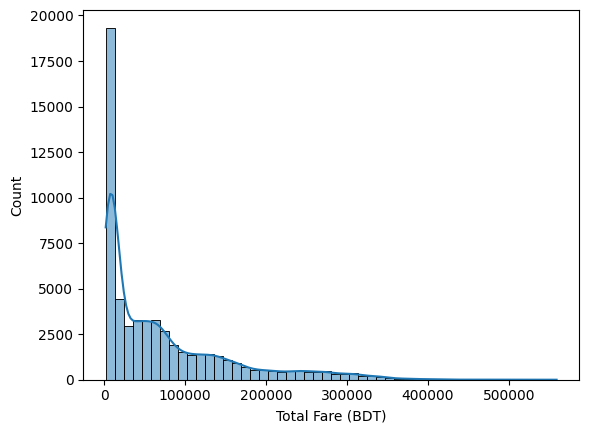

In [12]:
import seaborn as sns
sns.histplot(df["Total Fare (BDT)"], bins=50, kde=True)


<Axes: ylabel='Airline'>

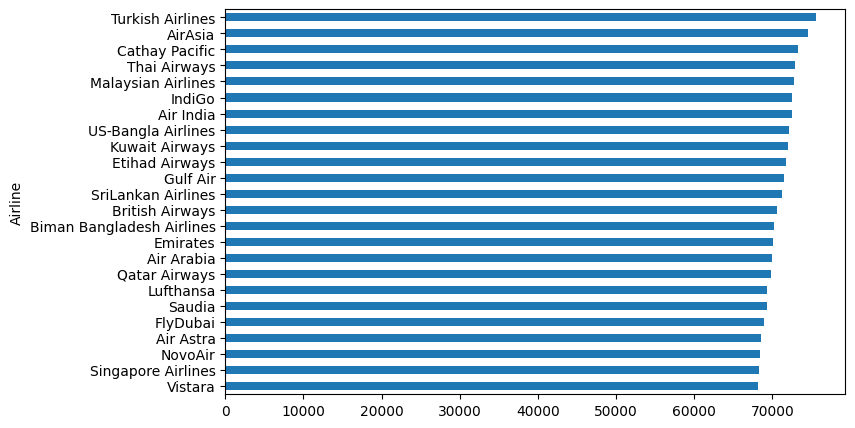

In [13]:
avg_fare_airline = (
    df.groupby("Airline")["Total Fare (BDT)"]
      .mean()
      .sort_values()
)

avg_fare_airline.plot(kind="barh", figsize=(8,5))


In [14]:
df["Airline"].value_counts()


Airline
US-Bangla Airlines           4496
Vistara                      2368
Lufthansa                    2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304
Malaysian Airlines           2292
Cathay Pacific               2282
Air India                    2280
Singapore Airlines           2279
NovoAir                      2268
Etihad Airways               2267
Qatar Airways                2267
Kuwait Airways               2262
Gulf Air                     2231
IndiGo                       2223
Turkish Airlines             2220
Air Arabia                   2217
British Airways              2209
SriLankan Airlines           2201
Name: count, dtype: int64

In [15]:
popular_route = (
    df.groupby(["Source", "Destination"])
      .size()
      .sort_values(ascending=False)
      .index[0]
)

route_df = df[
    (df["Source"] == popular_route[0]) &
    (df["Destination"] == popular_route[1])
]

route_df.groupby("Airline")["Total Fare (BDT)"].mean().sort_values()


Airline
Vistara                       67642.785927
British Airways               85333.790036
Emirates                      90249.250238
Etihad Airways                96296.313051
Turkish Airlines              98523.937488
FlyDubai                     100149.778797
Air India                    104524.176993
AirAsia                      106940.596196
NovoAir                      108460.856988
Saudia                       110839.317998
Thai Airways                 113160.019104
Lufthansa                    114404.024214
SriLankan Airlines           116245.095288
Air Astra                    116565.810302
Biman Bangladesh Airlines    118473.857467
Singapore Airlines           119108.655731
Air Arabia                   120389.102131
Malaysian Airlines           121368.907275
Kuwait Airways               134799.290061
US-Bangla Airlines           135007.884575
Gulf Air                     136484.095398
Cathay Pacific               137751.568503
Qatar Airways                144397.456694
Ind

Text(0.5, 1.0, 'Fare Distribution by Airline')

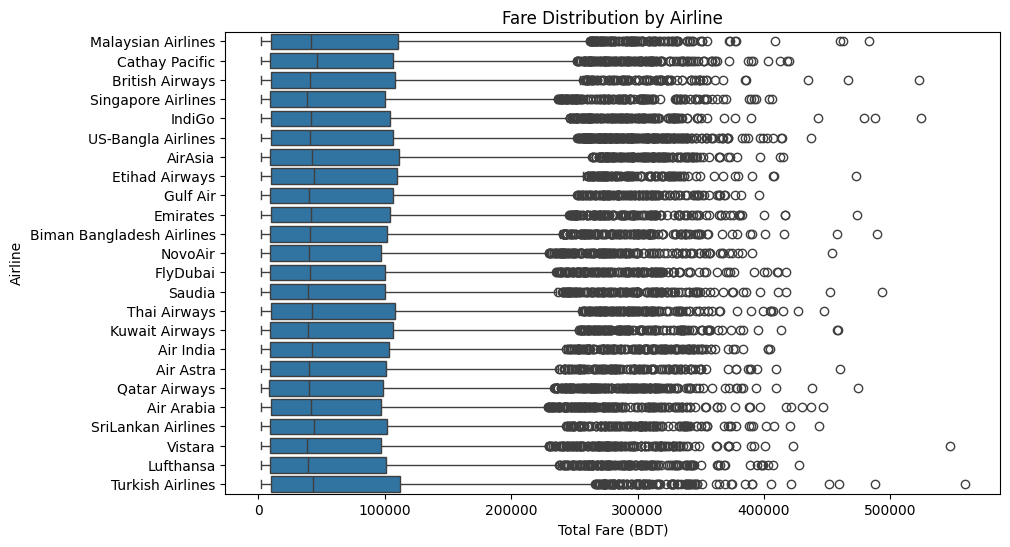

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Total Fare (BDT)",
    y="Airline"
)
plt.title("Fare Distribution by Airline")
